# Face Recognition - PubFig83

**D3APL – Aplicações em Ciência de dados**

Especialização em Ciência de Dados - IFSP Campinas

Alunos
- Daniel Vargas Shimamoto
- Diego Machado de Assis

# 1. Informações Gerais

## 1.1. Conhecendo  o dataset


## 1.2. Atributos:



## 1.3. Objetivo


# 2. Importações
## 2.1 Bibliotecas

In [88]:
# Bibliotecas básicas
import pandas as pd
import numpy as np
import os

# Visualização de imagem
import cv2
import matplotlib.pyplot as plt

## 2.2 Datasets

In [87]:
# Path das imagens
dataset_folder = '../Datasets/imgs/'

# Lista de pastas
class_folders = sorted(os.listdir(dataset_folder))

print(f'Número de Classes: {len(class_folders)}')

Número de Classes: 83


In [31]:
# Dataset de treino
train = pd.read_csv('../Datasets/train.csv')

# Dataset de treino
test = pd.read_csv('../Datasets/test.csv')

print(f'Train: {len(train)}')
print(f'Test: {len(test)}')

Train: 12178
Test: 1660


## 2.3 Preparação dos dados

In [26]:
# Número de amostras por Classe
min_images = 1000
max_images = 0

for class_folder in class_folders:
    full_class_folder = os.path.join(dataset_folder, class_folder)
    
    class_img_filenames = os.listdir(full_class_folder)
    images = len(class_img_filenames)
    print(f'{class_folder} - Número de imagem : {images}')
    if images < min_images:
        min_images = images
    if images > max_images:
        max_images = images

print(f'\nClasse com menos imagens: {min_images} Imagens')
print(f'Classe com mais imagens: {max_images} Imagens')    

Adam Sandler - Número de imagem : 108
Alec Baldwin - Número de imagem : 103
Angelina Jolie - Número de imagem : 214
Anna Kournikova - Número de imagem : 171
Ashton Kutcher - Número de imagem : 101
Avril Lavigne - Número de imagem : 299
Barack Obama - Número de imagem : 268
Ben Affleck - Número de imagem : 117
Beyonce Knowles - Número de imagem : 126
Brad Pitt - Número de imagem : 300
Cameron Diaz - Número de imagem : 246
Cate Blanchett - Número de imagem : 160
Charlize Theron - Número de imagem : 195
Christina Ricci - Número de imagem : 143
Claudia Schiffer - Número de imagem : 122
Clive Owen - Número de imagem : 134
Colin Farrell - Número de imagem : 145
Colin Powell - Número de imagem : 112
Cristiano Ronaldo - Número de imagem : 168
Daniel Craig - Número de imagem : 168
Daniel Radcliffe - Número de imagem : 246
David Beckham - Número de imagem : 187
David Duchovny - Número de imagem : 149
Denise Richards - Número de imagem : 200
Drew Barrymore - Número de imagem : 152
Dustin Hoffman 

In [75]:
# Dataframe com volume de amostras de treino e teste e a proporção entre eles
train_samples = train['image_pathname'].str.split('/', expand=True).loc[:,1].value_counts()
samples = pd.DataFrame(data = train_samples.values, index = train_samples.index, columns = ['Train_samples'])
samples['Test_samples'] = test['image_pathname'].str.split('/', expand=True).loc[:,1].value_counts()
samples['Proportion'] = samples['Test_samples'] / samples['Train_samples']
samples

,Train_samples,Test_samples,Proportion
Miley Cyrus,347,20,0.057637
Lindsay Lohan,334,20,0.059880
Jessica Simpson,280,20,0.071429
Brad Pitt,280,20,0.071429
Avril Lavigne,279,20,0.071685
...,...,...,...
Mariah Carey,82,20,0.243902
Ashton Kutcher,81,20,0.246914
Jack Nicholson,81,20,0.246914
Robert Gates,80,20,0.250000


In [81]:
# Criando uma coluna com as classes nos datasets de treino e test
train['class'] = train.iloc[:,0].str.split('/', expand=True).loc[:,1]
test['class'] = test.iloc[:,0].str.split('/', expand=True).loc[:,1]

In [83]:
train.sample(3)

,image_pathname,class
7220,imgs/Keira Knightley/447.jpg,Keira Knightley
4330,imgs/George Clooney/360.jpg,George Clooney
2565,imgs/Colin Farrell/37.jpg,Colin Farrell


In [84]:
test.sample(3)

,image_pathname,class
624,imgs/Gwyneth Paltrow/421.jpg,Gwyneth Paltrow
1485,imgs/Silvio Berlusconi/70.jpg,Silvio Berlusconi
833,imgs/Jessica Simpson/23.jpg,Jessica Simpson


# 2.4 Visualização das imagens

In [105]:
# read an image
def print_image (df, pos):
    img = cv2.imread('../Datasets/' + df.iloc[pos]['image_pathname'])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

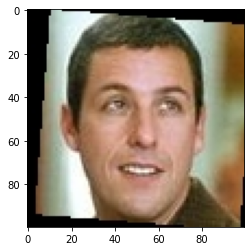

In [106]:
print_image(train, 5)

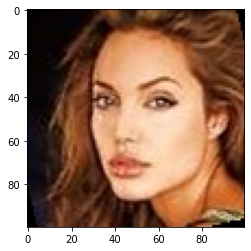

In [107]:
print_image(test, 50)